# NewsAPI Classification and Text Analysis
Authors: Christian Lee, Anahit Shekikyan, Graham Ward 

## Library Importing

In [1]:
import nltk
import random
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

## Function Creations

Please use this section to develop functions or place them here from previous assignments

In [16]:
# Function creations

# Functions from previous assignments before cell
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    total_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / total_tokens if total_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {total_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        token_counts = Counter(tokens)
        print(f"The {num_tokens} most common tokens are:")
        for token, count in token_counts.most_common(num_tokens):
            print(f" {token}: {count}")
                    
    return([total_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

# construct function for cleaning and tokenizing
def clean_and_tokenize(text, stopwords):
    """
    Clean and tokenize a single speech from the conventions.

    This function applies the following steps:
      1. Converts all characters to lowercase.
      2. Removes punctuation characters by replacing them with spaces.
      3. Collapses multiple whitespace characters into a single space and strips leading/trailing spaces.
      4. Splits the cleaned string into tokens on whitespace.
      5. Removes any tokens that are in the provided stopword set.

    Parameters
    ----------
    text : str
        A single text of a speech to clean and tokenize.
    stopwords : set
        A set of stopwords (all lowercase) to filter out from the resulting tokens.

    Returns
    -------
    list of str
        A list of cleaned tokens with punctuation removed, normalized case, and stopwords excluded.
    """
    # handle coercion to string format error handling
    if text is None:
        return []
    if not isinstance(text, str):
        text = str(text)
    # make lowercase
    text = text.lower()
    # punctuation removal
    text = "".join(ch if ch not in punctuation else " " for ch in text)
    # replace whitespace with single whitespace and remove leading/trailing ws
    text = ws_pattern.sub(" ", text).strip()
    # handle nulls
    if not text:
        return []
    # split cleaned string on space
    tokens = text.split()
    # remove stopwords
    return [t for t in tokens if t not in stopwords]

# special character locator and counter
def find_special_characters(df, columns):
    """
    Identify all unique special characters in one or more DataFrame columns,
    and return their counts.
    
    Args:
        df (pd.DataFrame): Input dataframe
        columns (str or list): Column name(s) to search
    
    Returns:
        dict: Dictionary of special characters and their counts
    """
    if isinstance(columns, str):  # allow a single column
        columns = [columns]
        
    pattern = re.compile(r"[^a-zA-Z0-9\s]")
    counter = Counter()
    
    for col in columns:
        for text in df[col].dropna():
            matches = pattern.findall(str(text))
            counter.update(matches)
    
    return dict(counter)


In [3]:
# create compiled regex obj matching one or more whitespace
ws_pattern = re.compile(r"\s+")
# setting the stopwords to english
sw = stopwords.words("english")
# making punctuation a set
punctuation = set(punctuation) # speeds up comparison

## Data Importing

In [4]:
# import the articles csv into a pandas dataframe for manipulation
df = pd.read_csv('articles.csv')

# print the head of the dataframe
print(df.head())

   category                                              title  \
0  business  Hasbro leaving Pawtucket for Boston, bringing ...   
1  business  Meta suppressed children’s safety research, fo...   
2  business  PNC to buy FirstBank for $4.1B, expanding to A...   
3  business  Mortgage rates dive on reports of worsening ec...   
4  business  US Steel is shutting down a mill in Illinois. ...   

                                         description  \
0  Hasbro, the century-old company behind childho...   
1  Four whistleblowers share documents with Congr...   
2  PNC Financial plans to buy Colorado-based Firs...   
3  One housing economist says the 30-year mortgag...   
4  US Steel will stop producing steel at its Gran...   

                                             content  content_len  
0  BOSTON —Hasbro, the century-old company behind...          200  
1  Two current and two former Meta employees disc...          200  
2  NEW YORK (AP) PNC Financial said Monday that i...          

## Initial Descriptive Stats and Data Exploration

In [5]:
# print out the unique colummns of the dataframe
print(df.columns)
# print the data types of each column
print("\n", df.dtypes)

Index(['category', 'title', 'description', 'content', 'content_len'], dtype='object')

 category       object
title          object
description    object
content        object
content_len     int64
dtype: object


In [6]:
# print the number of rows in the dataframe
print("The number of rows in the dataframe are: ", df.shape[0])

The number of rows in the dataframe are:  4131


In [11]:
# get counts for each category
article_counts = df['category'].value_counts().reset_index()
# counts
article_counts.columns = ['category', 'count']
# print
print(article_counts)

        category  count
0         sports    770
1       business    714
2         health    696
3        science    669
4     technology    520
5        general    399
6  entertainment    363


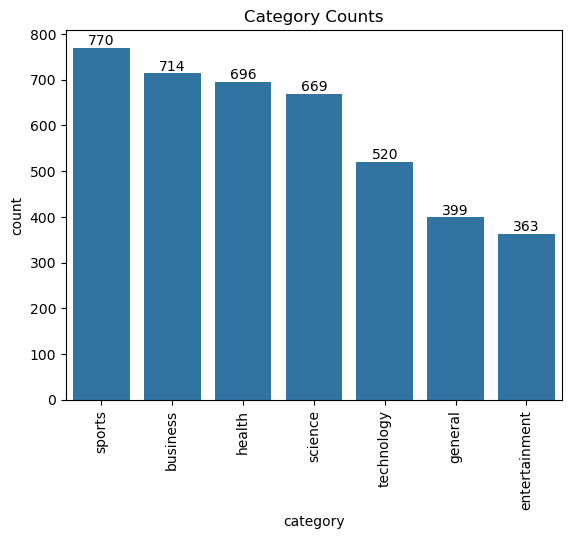

In [15]:
# visualization
ax = sns.barplot(x='category', y='count', data=article_counts)

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Category Counts")
plt.show()

In [ ]:
# Find and get special character counts for contents
content_special_characters = find_special_characters(df, ["content", "description", "title"])

print(content_special_characters)

{'—': 418, ',': 11178, '-': 8015, '.': 11218, '…': 4215, '’': 2236, '(': 961, ')': 932, '$': 470, "'": 3212, '&': 234, ';': 266, ':': 1861, '<': 1446, '>': 1417, '/': 836, '?': 537, '%': 198, '"': 1119, '[': 33, ']': 34, 'é': 91, 'ç': 8, '!': 156, '¥': 1, '£': 14, '“': 355, '”': 321, 'ñ': 13, '®': 4, '@': 24, '–': 148, '{': 17, '_': 22, '}': 14, '+': 75, 'á': 16, '·': 2, 'í': 14, '*': 38, 'É': 1, '‘': 362, 'ì': 1, '#': 34, 'ô': 6, 'ö': 7, '©': 13, '|': 100, 'Ö': 1, '\xad': 3, '−': 5, '²': 2, 'À': 1, 'ó': 4, '°': 4, 'î': 1, 'ü': 4, 'ú': 5, 'Á': 3, '~': 3, 'ª': 1, 'ê': 2, '€': 2, '™': 8, '\ufeff': 5, '=': 10, '₹': 3, '\u200b': 2, '‑': 1, 'ā': 2, 'γ': 1, 'Φ': 1, '�': 6, 'ř': 1, '😎': 1, 'ʻ': 1, 'č': 1, 'ć': 2, '¿': 2, 'Ü': 2, '₮': 1, 'Í': 1, 'à': 2, 'ã': 1, '₂': 1}


In [18]:
# find and get special characters counts for description
desc_special_characters = find_special_characters(df, ["content", "description", "title"])

print(desc_special_characters)

{'—': 418, ',': 11178, '-': 8015, '.': 11218, '…': 4215, '’': 2236, '(': 961, ')': 932, '$': 470, "'": 3212, '&': 234, ';': 266, ':': 1861, '<': 1446, '>': 1417, '/': 836, '?': 537, '%': 198, '"': 1119, '[': 33, ']': 34, 'é': 91, 'ç': 8, '!': 156, '¥': 1, '£': 14, '“': 355, '”': 321, 'ñ': 13, '®': 4, '@': 24, '–': 148, '{': 17, '_': 22, '}': 14, '+': 75, 'á': 16, '·': 2, 'í': 14, '*': 38, 'É': 1, '‘': 362, 'ì': 1, '#': 34, 'ô': 6, 'ö': 7, '©': 13, '|': 100, 'Ö': 1, '\xad': 3, '−': 5, '²': 2, 'À': 1, 'ó': 4, '°': 4, 'î': 1, 'ü': 4, 'ú': 5, 'Á': 3, '~': 3, 'ª': 1, 'ê': 2, '€': 2, '™': 8, '\ufeff': 5, '=': 10, '₹': 3, '\u200b': 2, '‑': 1, 'ā': 2, 'γ': 1, 'Φ': 1, '�': 6, 'ř': 1, '😎': 1, 'ʻ': 1, 'č': 1, 'ć': 2, '¿': 2, 'Ü': 2, '₮': 1, 'Í': 1, 'à': 2, 'ã': 1, '₂': 1}


In [19]:
# Find and get special character counts for titles
title_special_characters = find_special_characters(df, ["content", "description", "title"])

print(title_special_characters)

{'—': 418, ',': 11178, '-': 8015, '.': 11218, '…': 4215, '’': 2236, '(': 961, ')': 932, '$': 470, "'": 3212, '&': 234, ';': 266, ':': 1861, '<': 1446, '>': 1417, '/': 836, '?': 537, '%': 198, '"': 1119, '[': 33, ']': 34, 'é': 91, 'ç': 8, '!': 156, '¥': 1, '£': 14, '“': 355, '”': 321, 'ñ': 13, '®': 4, '@': 24, '–': 148, '{': 17, '_': 22, '}': 14, '+': 75, 'á': 16, '·': 2, 'í': 14, '*': 38, 'É': 1, '‘': 362, 'ì': 1, '#': 34, 'ô': 6, 'ö': 7, '©': 13, '|': 100, 'Ö': 1, '\xad': 3, '−': 5, '²': 2, 'À': 1, 'ó': 4, '°': 4, 'î': 1, 'ü': 4, 'ú': 5, 'Á': 3, '~': 3, 'ª': 1, 'ê': 2, '€': 2, '™': 8, '\ufeff': 5, '=': 10, '₹': 3, '\u200b': 2, '‑': 1, 'ā': 2, 'γ': 1, 'Φ': 1, '�': 6, 'ř': 1, '😎': 1, 'ʻ': 1, 'č': 1, 'ć': 2, '¿': 2, 'Ü': 2, '₮': 1, 'Í': 1, 'à': 2, 'ã': 1, '₂': 1}


## Data Cleaning and Preprocessing

## Exploratory Data Analysis

## Data Splitting and Class Imbalance

## Model Development (Training, Validation and Testing)

## Topic Modeling

## Results